In [1]:
!jupyter nbextension enable --py widgetsnbextension
from PIL import Image
from matplotlib import pyplot as plt
from src.models.vit import ViT
from torchsummary import summary
from src.utils.transforms import ImageTransform
import numpy as np

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


(992, 1600, 3)

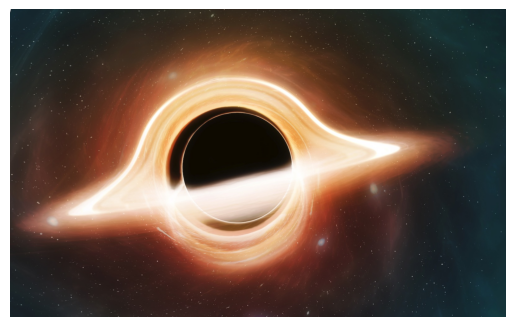

In [2]:
img = np.asarray(Image.open("./resources/blackhole.jpeg"))
plt.axis("off")
plt.imshow(img)
img.shape

In [3]:
a_transform = ImageTransform("train")
x = a_transform(img)
x = x.unsqueeze(0).repeat(5, 1, 1, 1) # add batch dim
x.shape

torch.Size([5, 3, 224, 224])

In [4]:
k = 16
b, c, *_ = x.shape
patches = x.unfold(2, k, k).unfold(3, k, k)
patches = patches.reshape(b, -1, k * k * c)
print(patches.shape)

torch.Size([5, 196, 768])


In [5]:
ViT()(x).shape

torch.Size([5, 1, 1000])

In [6]:
from torchsummary import summary
summary(ViT(), (3, 224, 224), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 768, 14, 14]         590,592
  LambdaPatchLayer-2             [-1, 196, 768]               0
    PatchEmbedding-3             [-1, 197, 768]               0
         LayerNorm-4             [-1, 197, 768]           1,536
            Linear-5             [-1, 197, 768]         590,592
            Linear-6             [-1, 197, 768]         590,592
            Linear-7             [-1, 197, 768]         590,592
           Dropout-8          [-1, 8, 197, 197]               0
            Linear-9             [-1, 197, 768]         590,592
MultiHeadAttention-10             [-1, 197, 768]               0
          Dropout-11             [-1, 197, 768]               0
      ResidualAdd-12             [-1, 197, 768]               0
        LayerNorm-13             [-1, 197, 768]           1,536
           Linear-14            [-1, 1